## Reconocimiento de caras

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
import pylab # this allows you to control figure size

### Cargar las imagenes

In [11]:
imagenes = []
for root, dirs, files in os.walk(".", topdown=False):
    if len(files) != 0:
        for name in files:
            imagenes.append(os.path.join(root, name))
    else:
        break      

### Funciones

In [53]:
def obtener_cara(img):
  face_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                  'haarcascade_frontalface_default.xml')

  gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  caras = face_cascade.detectMultiScale(gris, 
                                 scaleFactor=1.3, 
                                 minNeighbors=4, 
                                 minSize=(30, 30),
                                 flags=cv.CASCADE_SCALE_IMAGE)  
  c=[]
  for (x,y,w,h) in caras:
      c.append(gris[y:y+h,x:x+w])
  return c

def predict_face(modelo, img):
    #localizas la cara
    roi = obtener_cara(img)
    # roi
    id, confianza = modelo.predict(roi[0])
    if id == 0:
      print(f'id= {id} nombre= Biden confianza= {confianza}')
    elif id == 1:
      print(f'id= {id} nombre= Elon Musk confianza= {confianza}')
    elif id == 2:
      print(f'id= {id} nombre= Pedro Sanchez confianza= {confianza}')
    elif id == 3:
      print(f'id= {id} nombre= Putin confianza= {confianza}')


### Mostramos las caras que reconoce de las imagenes que le pasamos

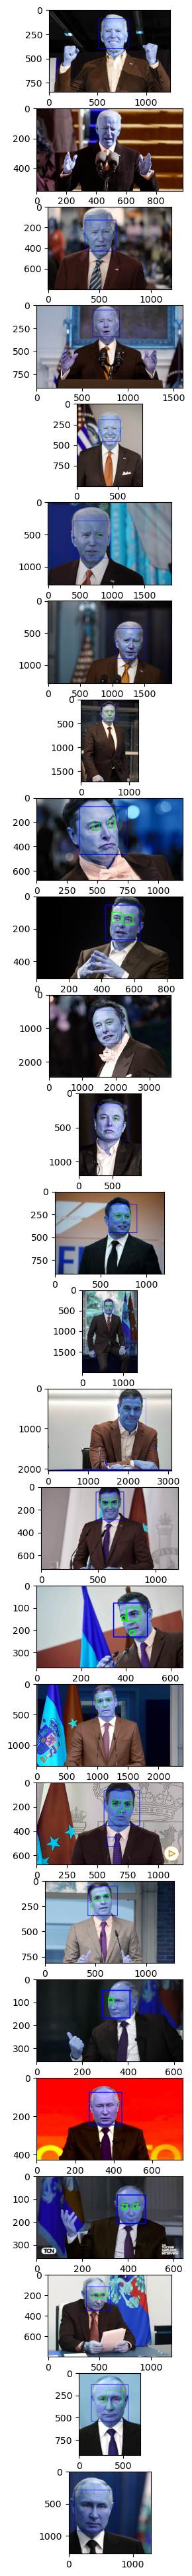

In [32]:
fig, (axs) = plt.subplots(nrows=len(imagenes), ncols=1, figsize=(50, 50))
for rang in range(len(imagenes)):

        img = cv.imread(imagenes[rang])

        face_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                        'haarcascade_frontalface_default.xml')
        eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + \
                                        'haarcascade_eye.xml')

        gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        caras = face_cascade.detectMultiScale(img, 
                                 scaleFactor=1.3, 
                                 minNeighbors=4, 
                                 minSize=(30, 30),
                                 flags=cv.CASCADE_SCALE_IMAGE)
        img2 = img.copy()
        for (x,y,w,h) in caras:
                cv.rectangle(img2, (x,y), (x+w, y+h), (0,0,255), 4)
                roi = gris[y:y+h, x:x+w]
                roi_color = img2[y:y+h, x:x+w]
                ojos = eye_cascade.detectMultiScale(roi, 3, 1)
        for (x,y,w,h) in ojos:
                cv.rectangle(roi_color, (x,y), (x+w, y+h), (0,255, 0), 4)

        axs[rang].imshow(img2,cmap="gray")


Guardamos las caras con sus indices

In [33]:
caras = []
valores = []
indice = 0
for root, dirs, files in os.walk(".", topdown=False):
    if len(files) != 0:
        for name in files:
            img = cv.imread(os.path.join(root, name))
            carasF=obtener_cara(img)
            if len(carasF)>0:
                for i in carasF:
                    caras.append(i)
                    valores.append(indice)
    else:
        break   
    indice += 1

Instalacion de la libreria necesaria: **pip install opencv-contrib-python**

Entrenamiento del modelo

In [35]:
modelo= cv.face.LBPHFaceRecognizer_create()

modelo.train(np.array(caras,dtype=object),
             np.array(valores,dtype=int))

Pruebas

In [54]:
img1 = cv.imread("pruebas/biden1.jpg")
img2 = cv.imread("pruebas/elonmusk1.jpg")
img3 = cv.imread("pruebas/putin1.jpg")
img4 = cv.imread("pruebas/pedrosanchez1.jpg")

predict_face(modelo,img1)
predict_face(modelo,img2)
predict_face(modelo,img3)
predict_face(modelo,img4)

id= 0 nombre= Biden confianza= 20.8436107127436
id= 1 nombre= Elon Musk confianza= 23.244722323005092
id= 3 nombre= Putin confianza= 26.151326270885043
id= 2 nombre= Pedro Sanchez confianza= 24.52396745444202
